In [59]:
import os
import sys
import numpy as np
import tensorflow as tf
from PIL import Image
from keras import backend as K
from skimage import io, transform
from keras.models import load_model
from keras.backend.tensorflow_backend import set_session
from util import InstanceNormalization2D
os.environ["CUDA_VISIBLE_DEVICES"]="1"
K.set_learning_phase(True)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

def tileAttr(x):
    x = tf.expand_dims(x, axis = 1)
    x = tf.expand_dims(x, axis = 2)
    return tf.tile(x, [1, 256, 256, 1])

def tileAttr2(x):
        x = tf.expand_dims(x, axis = 1)
        x = tf.expand_dims(x, axis = 2)
        return tf.tile(x, [1, 4, 4, 1])

starGan = load_model('model/generator290.h5', custom_objects={'InstanceNormalization2D':InstanceNormalization2D, 'tileAttr':tileAttr, 'tf':tf})



/usr/local/lib/python3.5/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [128]:
temp = io.imread('/share/data/celeba-hq/celeba-256/12345.jpg')
temp = temp/127.5 - 1

In [131]:
imgIndex = np.load("imgIndex.npy")
imgAttr = np.load("anno_dic.npy").item()

# new_attrs = ['5_o_Clock_Shadow', 'Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Male', 'Mustache', 'Pale_Skin', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Hat', 'Young']



attr = np.array(imgAttr[imgIndex[12345]])

attr2 = np.array(attr)
attr2[4] = 0.0
attr2[2] = 1.0

attr3 = np.array(attr)
attr3[3] = 1.0
attr3[4] = 0.0

attr4 = np.array(attr)
attr4[8] = 1.0

attr5 = np.array(attr)
attr5[0] = 1.0
attr5[8] = 1.0
attr5[9] = 1.0
attr5[6] = 1.0

attr6 = np.array(attr)
attr6[11] = 0.0
# attr6[12] = 1.0

attr7 = np.array(attr)
attr7[10] = 1.0

print(attr)
print(attr2)
print(attr3)
print(attr4)
print(attr5)
print(attr6)
print(attr7)


attt = [attr2, attr3, attr4, attr5, attr6, attr7]


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
[1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]


/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


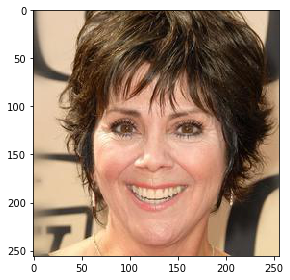

In [132]:
output = np.expand_dims(temp, axis=0)
io.imshow(output[0]/2+0.5)
outputs = [None]*(len(attt)+1)
outputs[0] = output
for i in range(0, len(attt)):
    outputs[i+1] = starGan.predict([output, np.expand_dims(attt[i], axis=0)])
images = np.concatenate(outputs, axis = 0)
width = 1
height = len(attt)+1
new_im = Image.new('RGB', (256*height, 256*width))
for ii in range(height):
    for jj in range(width):
        index=ii*width+jj
        image = (images[index]/2+0.5)*255
        image = image.astype(np.uint8)
        new_im.paste(Image.fromarray(image,"RGB"), (256*ii,256*jj))
    filename = "abc.png"
new_im.save(filename)